In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Stress-Lysis.csv')
data.head()

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


Data Preparation

In [3]:
data.shape

(2001, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step_count    2001 non-null   int64  
 3   Stress_Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Humidity,2001.0,20.000000,5.777833,10.0,15.0,20.0,25.0,30.0
Temperature,2001.0,89.000000,5.777833,79.0,84.0,89.0,94.0,99.0
Step_count,2001.0,100.141429,58.182948,0.0,50.0,101.0,150.0,200.0
Stress_Level,2001.0,1.104448,0.771094,0.0,0.0,1.0,2.0,2.0


In [8]:
data.isnull().sum()

Humidity        0
Temperature     0
Step_count      0
Stress_Level    0
dtype: int64

In [9]:
data.duplicated().sum()

0

Exploratory Data Analysis

In [10]:
data['Stress_Level'].unique()

array([1, 2, 0], dtype=int64)

In [12]:
data['Stress_Level'].value_counts()

1    790
2    710
0    501
Name: Stress_Level, dtype: int64

In [14]:
data.skew()

Humidity        1.179993e-18
Temperature    -1.297993e-17
Step_count     -6.998237e-03
Stress_Level   -1.811032e-01
dtype: float64

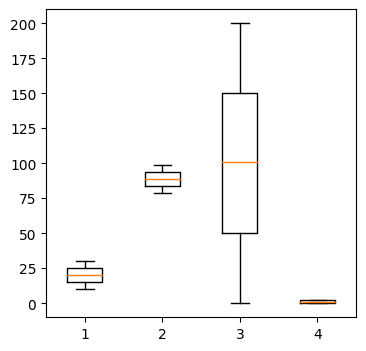

In [15]:
plt.figure(figsize=(4,4))
plt.boxplot(data)
plt.show()

In [17]:
# Transformasi Logaritma
hum_log = np.log(data['Humidity'])
humadity = round(hum_log.skew(), 10)

print(humadity)

-0.3790364332


In [18]:
# Transformasi SquareRoot
temp_sqrt = np.sqrt(data['Temperature'])
temp_sqrt.skew()

temperature = round(temp_sqrt.skew(), 10)
print(temperature)

-0.0390881104


In [19]:
Q1 = data['Step_count'].quantile(0.25)
Q2 = data['Step_count'].quantile(0.75)

In [20]:
Q1

50.0

In [21]:
Q2

150.0

In [22]:
data['Step_count'] = np.where(data['Step_count']<Q1, Q1, data['Step_count'])
data['Step_count'] = np.where(data['Step_count']>Q2, Q2, data['Step_count'])

In [23]:
step_count = round(data['Step_count'].skew(), 10)
print(step_count)

-0.0094975784


In [24]:
# Transformasi SquareRoot
stress_sqrt = np.sqrt(data['Stress_Level'])
SL = round(stress_sqrt.skew(), 10)

print(SL)

-0.7944935599


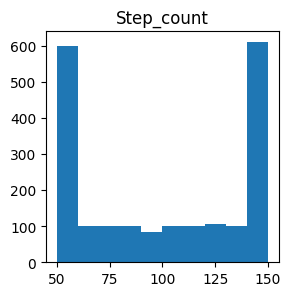

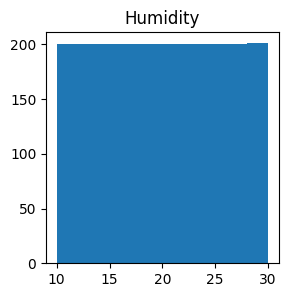

In [25]:
column=['Step_count','Humidity']
for category in column:
    plt.figure(figsize=(3,3))
    plt.hist(data[category])
    plt.title(category)
    plt.show()

<AxesSubplot: xlabel='Stress_Level', ylabel='Count'>

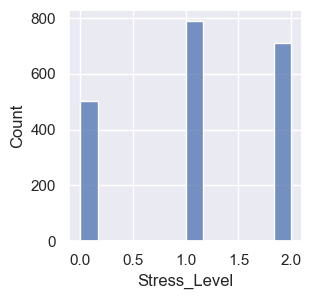

In [26]:
plt.figure(figsize=(3,3))
sns.set(font_scale=1)
sns.histplot(data=data, x='Stress_Level')

<AxesSubplot: >

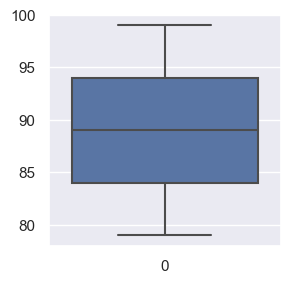

In [27]:
plt.figure(figsize=(3,3))
sns.boxplot(data['Temperature'])

Korelasi/Correlation

In [28]:
corr = data.corr()
corr

,Humidity,Temperature,Step_count,Stress_Level
Humidity,1.000000,1.000000,0.902053,0.936036
Temperature,1.000000,1.000000,0.902053,0.936036
Step_count,0.902053,0.902053,1.000000,0.859096
Stress_Level,0.936036,0.936036,0.859096,1.000000


<AxesSubplot: >

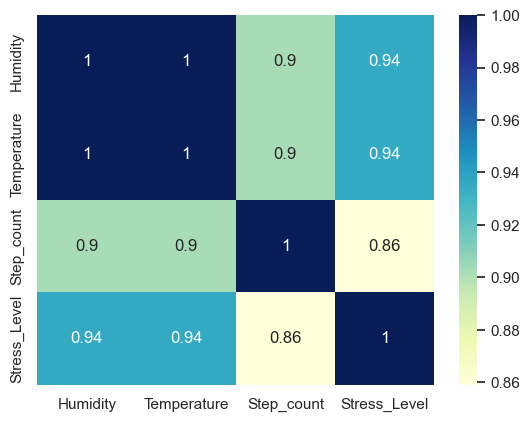

In [31]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)

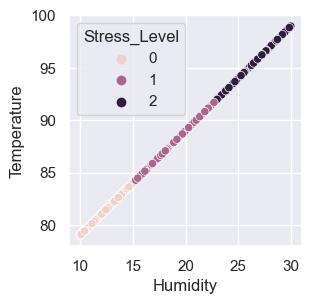

In [32]:
plt.figure(figsize=(3,3))
sns.scatterplot(x='Humidity',y='Temperature',hue='Stress_Level',data=data)
plt.show()

Pre Modelling

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x = data.drop(columns='Stress_Level')
y = data['Stress_Level']

In [35]:
x.head()

,Humidity,Temperature,Step_count
0,21.33,90.33,123.0
1,21.41,90.41,93.0
2,27.12,96.12,150.0
3,27.64,96.64,150.0
4,10.87,79.87,87.0


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [37]:
x_train.shape

(1500, 3)

In [38]:
x_test.shape

(501, 3)

Modelling

In [39]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
regressor.fit(x_train,y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
y_pred = regressor.predict(x_test)

In [42]:
y_pred

array([0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1,
       1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 1, 1,
       2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0,
       1, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 2, 1, 2, 0,
       1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2, 1, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2,
       2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0,
       1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2,
       0, 1, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 1, 2,

In [43]:
print(confusion_matrix(y_test, y_pred))

[[128   0   0]
 [  0 190   0]
 [  0   0 183]]


In [44]:
print(accuracy_score(y_test,y_pred))

1.0


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       190
           2       1.00      1.00      1.00       183

    accuracy                           1.00       501
   macro avg       1.00      1.00      1.00       501
weighted avg       1.00      1.00      1.00       501



SVM Model

In [46]:
from sklearn.svm import SVC

In [47]:
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [48]:
y_pred1 = classifier.predict(x_test)

In [49]:
y_pred1

array([0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1,
       1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 1, 1,
       2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0,
       1, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 2, 1, 2, 0,
       1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2, 1, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2,
       2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0,
       1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2,
       0, 1, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 1, 2,

In [50]:
print(accuracy_score(y_test, y_pred1))

1.0


In [51]:
print(confusion_matrix(y_test, y_pred1))

[[128   0   0]
 [  0 190   0]
 [  0   0 183]]


In [52]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       190
           2       1.00      1.00      1.00       183

    accuracy                           1.00       501
   macro avg       1.00      1.00      1.00       501
weighted avg       1.00      1.00      1.00       501



Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0)
model.fit(x_train,y_train)
prediction = model.predict(x_test)

In [54]:
print(accuracy_score(y_test, prediction))

1.0


Save Model Random Forest

In [55]:
import pickle

In [56]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

In [58]:
filename = 'stress_trained.sav'
pickle.dump(classifier,open(filename,'wb'))

Simple Prediction

In [57]:
input_data = (11.05,80.05,14) 

id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = classifier.predict(id_reshaped)
print(prediction)

if(prediction[0]==0):
    print("Stress Level: LOW")
elif(prediction[0]==1):
    print("Stress Level: MEDIUM")
else:
    print("Stress Level: HIGH")

[0]
Stress Level: LOW


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
